In [1]:
%matplotlib inline
import numpy as np
import poppy

import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py

import timeit

## Generating Data

In [3]:
highest_coeff = 15
bounds = [100e-9]*(highest_coeff-1) #piston not included
#bounds = [1500e-9,1500e-9,800e-9] #piston not included

N = 10 #number of examples

wfe_array = generate_wfe_array(bounds,N)
print(wfe_array.shape)
print(wfe_array[:,:3])

(14, 10)
[[-2.25667816e-08 -1.64434895e-08  7.45198455e-08]
 [ 5.09446585e-08  1.78453071e-08 -2.03483085e-08]
 [ 6.39991595e-08 -3.20851168e-08  5.15678388e-09]
 [-9.81652625e-09  1.00095259e-08  9.80783819e-08]
 [-1.54980587e-08 -8.43229990e-08 -9.37383785e-08]
 [ 7.62626077e-08  6.10768997e-08 -4.94411618e-08]
 [-6.10791838e-08 -7.08079940e-08 -5.36513633e-09]
 [-1.58673695e-08  4.50118672e-09 -4.89173320e-08]
 [-2.67434652e-08  7.98132028e-08 -5.72535747e-08]
 [ 5.73888376e-08 -6.00889450e-08 -4.94576500e-09]
 [ 6.70472800e-08  3.29726115e-08 -3.01843569e-11]
 [ 9.57746490e-08 -7.00243358e-08  3.02479140e-08]
 [ 5.88183946e-08  8.94382164e-09 -1.06461477e-08]
 [ 5.44019038e-08 -6.43506282e-08  5.83723323e-08]]


In [10]:
rms_wfe_calc = np.sqrt(np.sum(np.power(wfe_array,2),(0)))
print(rms_wfe_calc.shape)
max_wfe = 300e-9;
desired_wfe = np.random.uniform(high=max_wfe,size=(N))
wfe_array = np.multiply(np.divide(wfe_array,rms_wfe_calc),desired_wfe)

(10,)


In [3]:
file_out = 'test.hdf5'
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='fqpm'
npix_pupil = 512

npix_detector = 256
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector


In [4]:
simulate_multiple_llowfs(wfe_array,file_out,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil)

## Reading Data

In [5]:
with h5py.File('test.hdf5', 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(28, 10)
(256, 256, 10)


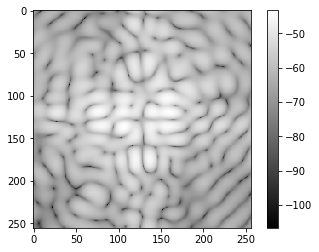

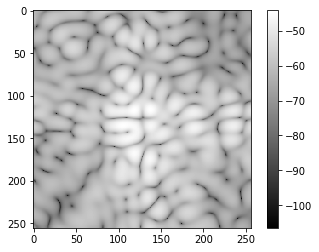

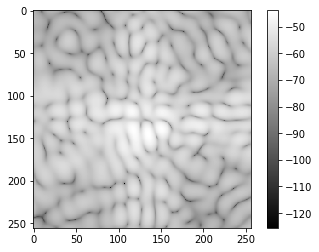

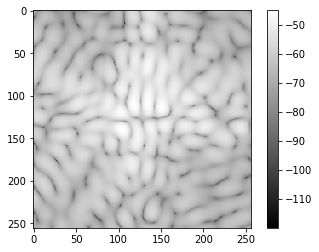

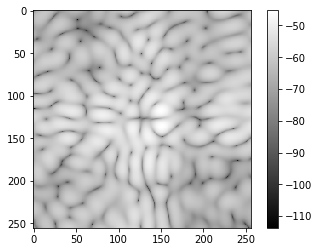

In [6]:
for i in range(5):
    plt.figure()
    plt.imshow(10*np.log10(images[:,:,i]),cmap='gray')
    plt.colorbar()

In [28]:
print(coeffs[:,3])

[-6.80528281e-08  5.03966432e-07  5.86190622e-07]
